In [1]:
#importing packages
import pandas as pd
import numpy as np

In [2]:
# Importing the dataset
dataset = pd.read_csv('../OR - 21.csv')
X = dataset.iloc[:, 1:4].values
y = dataset.iloc[:, 0:1].values

In [3]:
dataset.head(5)

,Bearing,Fault Diameter,DE,FE
0,Normal,0.0,0.064254,0.038625
1,Normal,0.0,0.063002,0.096769
2,Normal,0.0,-0.004381,0.127382
3,Normal,0.0,-0.035882,0.144640
4,Normal,0.0,-0.023991,0.086702


In [4]:
#Retrieve Random Data
dataset.sample(10)

,Bearing,Fault Diameter,DE,FE
234180,"Outer Race (0.021"")",0.021,0.043045,0.045816
57023,Normal,0.000,-0.099927,0.008013
207679,"Outer Race (0.021"")",0.021,-0.018680,0.008424
218900,"Outer Race (0.021"")",0.021,-0.114111,0.124916
45118,Normal,0.000,0.108689,0.106015
176951,"Outer Race (0.021"")",0.021,-0.041015,-0.013149
207704,"Outer Race (0.021"")",0.021,0.076751,0.162515
153422,"Outer Race (0.021"")",0.021,0.192486,-0.086085
207707,"Outer Race (0.021"")",0.021,-0.337053,0.040064
172536,"Outer Race (0.021"")",0.021,-1.864349,0.191484


In [5]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.compose import ColumnTransformer
labelencoder_y = LabelEncoder()
y[:,0] = labelencoder_y.fit_transform(y[:,0])
ct = ColumnTransformer([("Bearing", OneHotEncoder(), [0])],    remainder = 'passthrough')
y = ct.fit_transform(y)

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [8]:
y_train

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [0., 1.]])

In [9]:
import keras
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [10]:
classifier = Sequential()

In [11]:
classifier.add(Dense(output_dim = 3, kernel_initializer = 'uniform', activation = 'relu', input_dim = 3))

C:\Users\leste\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", activation="relu", input_dim=3, units=3)`
  """Entry point for launching an IPython kernel.


In [12]:
classifier.add(Dense(output_dim = 3, kernel_initializer = 'uniform', activation = 'relu'))

C:\Users\leste\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", activation="relu", units=3)`
  """Entry point for launching an IPython kernel.


In [13]:
classifier.add(Dense(output_dim = 2, kernel_initializer = 'uniform', activation = 'sigmoid'))

C:\Users\leste\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(kernel_initializer="uniform", activation="sigmoid", units=2)`
  """Entry point for launching an IPython kernel.


In [14]:
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [15]:

model = classifier.fit(X_train, y_train, batch_size = 100, nb_epoch = 100, shuffle = False)


C:\Users\leste\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/100
193792/193792 [==============================] - 4s 22us/step - loss: 0.2508 - accuracy: 0.9776
Epoch 2/100
193792/193792 [==============================] - 4s 19us/step - loss: 0.0481 - accuracy: 1.0000
Epoch 3/100
193792/193792 [==============================] - 4s 18us/step - loss: 0.0181 - accuracy: 1.0000
Epoch 4/100
193792/193792 [==============================] - 4s 18us/step - loss: 0.0076 - accuracy: 1.0000
Epoch 5/100
193792/193792 [==============================] - 4s 19us/step - loss: 0.0033 - accuracy: 1.0000
Epoch 6/100
193792/193792 [==============================] - 4s 21us/step - loss: 0.0015 - accuracy: 1.0000
Epoch 7/100
193792/193792 [==============================] - 4s 20us/step - loss: 6.5814e-04 - accuracy: 1.0000
Epoch 8/100
193792/193792 [==============================] - 4s 19us/step - loss: 2.9428e-04 - accuracy: 1.0000
Epoch 9/100
193792/193792 [==============================] - 4s 19us/step - loss: 1.3175e-04 - accuracy: 1.0000
Epoch 10/100
193

193792/193792 [==============================] - 4s 18us/step - loss: 2.2653e-08 - accuracy: 1.0000
Epoch 74/100
193792/193792 [==============================] - 4s 19us/step - loss: 2.2789e-08 - accuracy: 1.0000
Epoch 75/100
193792/193792 [==============================] - 4s 18us/step - loss: 2.2932e-08 - accuracy: 1.0000
Epoch 76/100
193792/193792 [==============================] - 3s 18us/step - loss: 2.3077e-08 - accuracy: 1.0000
Epoch 77/100
193792/193792 [==============================] - 4s 18us/step - loss: 2.2089e-08 - accuracy: 1.0000
Epoch 78/100
193792/193792 [==============================] - 4s 18us/step - loss: 2.2214e-08 - accuracy: 1.0000
Epoch 79/100
193792/193792 [==============================] - 3s 18us/step - loss: 2.2342e-08 - accuracy: 1.0000
Epoch 80/100
193792/193792 [==============================] - 3s 15us/step - loss: 2.2464e-08 - accuracy: 1.0000
Epoch 81/100
193792/193792 [==============================] - 3s 15us/step - loss: 2.2579e-08 - accuracy: 1.0

In [16]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

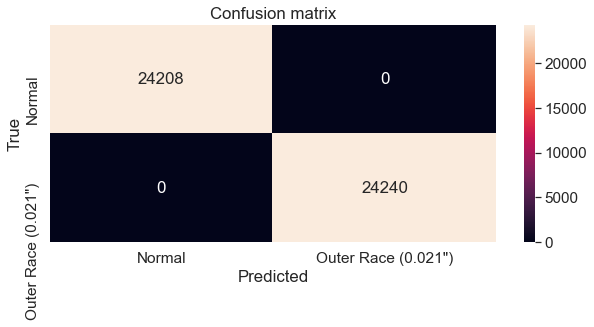

In [17]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

index = ['Normal', 'Outer Race (0.021")']  
columns = ['Normal', 'Outer Race (0.021")']  
cm_df = pd.DataFrame(cm,columns,index)  


plt.figure(figsize=(10,4))
sn.set(font_scale=1.4) # for label size
sn.heatmap(cm_df, annot=True, fmt='g') # font size
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

plt.show()

In [18]:
classifier.evaluate(X_test, y_test)

48448/48448 [==============================] - 1s 14us/step


[2.2312021256262825e-08, 1.0]

In [19]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_pred, target_names=['Normal', 'Outer Race (0.021")'])
print(cr)

                     precision    recall  f1-score   support

             Normal       1.00      1.00      1.00     24208
Outer Race (0.021")       1.00      1.00      1.00     24240

          micro avg       1.00      1.00      1.00     48448
          macro avg       1.00      1.00      1.00     48448
       weighted avg       1.00      1.00      1.00     48448
        samples avg       1.00      1.00      1.00     48448

